# Implementing 1D Kalman Filter 

In [10]:
from math import *
import matplotlib.pyplot as plt
import numpy as np

# gaussian function
def f(mu, sigma2, x):
    ''' f takes in a mean and squared variance, and an input x
       and returns the gaussian value.'''
    coefficient = 1.0 / sqrt(2.0 * pi *sigma2)
    exponential = exp(-0.5 * (x-mu) ** 2 / sigma2)
    return coefficient * exponential

In [11]:
# update function
def update(mean1, var1, mean2, var2):
    new_mean = (var2*mean1 + var1*mean2)/(var2+var1)
    new_var = 1/(1/var2 + 1/var1)
    
    return [new_mean, new_var]

# motion update/predict function
def predict(mean1, var1, mean2, var2):
    new_mean = mean1 + mean2
    new_var = var1 + var2
    
    return [new_mean, new_var]

In [12]:
# measurements for mu and motions, U
measurements = [5., 6., 7., 9., 10.]
motions = [1., 1., 2., 1., 1.]

# initial parameters
measurement_sig = 4.
motion_sig = 2.
mu = 0.
sig = 10000.

for n in range(len(measurements)):
    # measurement update, with uncertainty
    mu, sig = update(mu, sig, measurements[n], measurement_sig)
    print('Update: [{}, {}]'.format(mu, sig))
    # motion update, with uncertainty
    mu, sig = predict(mu, sig, motions[n], motion_sig)
    print('Predict: [{}, {}]'.format(mu, sig))
    
# print the final, resultant mu, sig
print('\n')
print('Final result: [{}, {}]'.format(mu, sig))

Update: [4.998000799680128, 3.9984006397441023]
Predict: [5.998000799680128, 5.998400639744102]
Update: [5.999200191953932, 2.399744061425258]
Predict: [6.999200191953932, 4.399744061425258]
Update: [6.999619127420922, 2.0951800575117594]
Predict: [8.999619127420921, 4.09518005751176]
Update: [8.999811802788143, 2.0235152416216957]
Predict: [9.999811802788143, 4.023515241621696]
Update: [9.999906177177365, 2.0058615808441944]
Predict: [10.999906177177365, 4.005861580844194]


Final result: [10.999906177177365, 4.005861580844194]


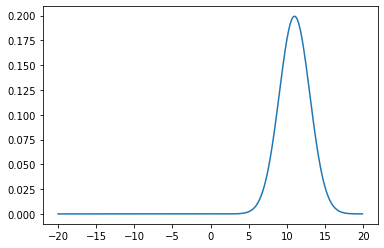

In [13]:
## Kalman filter output in Gausian form
mu = mu
sigma2 = sig

# define a range of x values
x_axis = np.arange(-20, 20, 0.1)

g = []
for x in x_axis:
    g.append(f(mu, sigma2, x))

# plot the result 
plt.plot(x_axis, g)